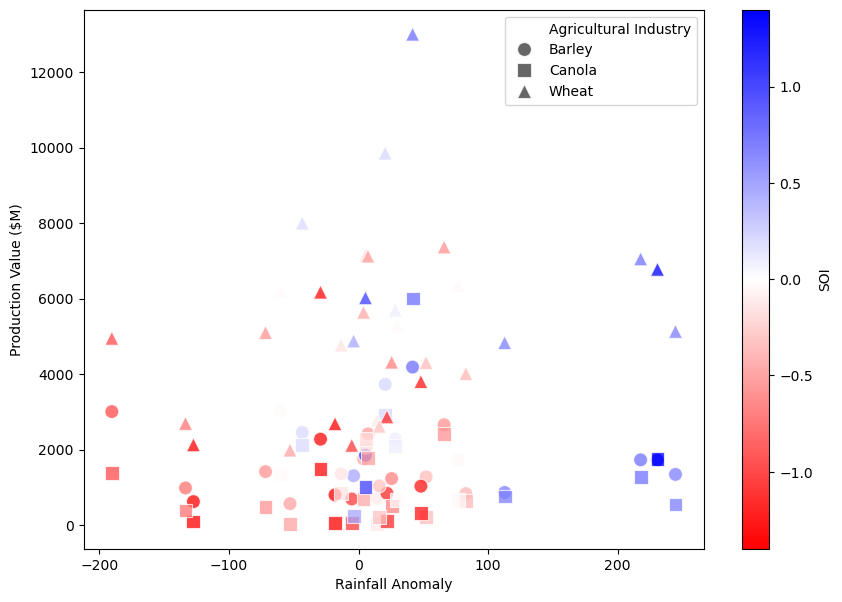

In [10]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
df = pd.read_csv(r"C:\Users\oscar\Downloads\Final Data Yearly.csv")
df = df.loc[:,["Year","ABARES: Barley - Production ($M)", "ABARES: Canola - Production ($M)", "ABARES: Wheat - Production ($M)", "Rainfall Anomaly", "SOI"]]
df.rename(columns = {"ABARES: Barley - Production ($M)":"Barley", "ABARES: Canola - Production ($M)":"Canola", "ABARES: Wheat - Production ($M)":"Wheat"}, inplace = True)
df = df.melt(id_vars = ["Year", "Rainfall Anomaly", "SOI"], value_vars = ["Barley", "Canola", "Wheat"], var_name = ["Agricultural Industry"], value_name = "Production Value ($M)")

plt.figure(figsize = (10,7))
ax = sns.scatterplot(
    data = df, 
    x = "Rainfall Anomaly", 
    y = "Production Value ($M)", 
    hue = "SOI", 
    style = "Agricultural Industry", 
    palette = "bwr_r", 
    alpha = 0.75, 
    s = 100, 
    markers = {"Barley":"o", "Canola":"s", "Wheat":"^"}
)

norm = plt.Normalize(-df["SOI"].max(), df["SOI"].max())
sm = plt.cm.ScalarMappable(cmap = "bwr_r", norm = norm)
sm.set_array([])

h,l = ax.get_legend_handles_labels()
plt.legend(h[-4:],l[-4:], loc=1, borderaxespad=0.5)
colourbar = ax.figure.colorbar(sm, ax = ax)
colourbar.set_label("SOI")

plt.show()